**Importing libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier 
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score , precision_score , recall_score
from sklearn.metrics import classification_report


Importing Data

In [3]:
data =pd.read_csv('Credit_Score_Classification_Dataset.csv')

In [4]:
data

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High
...,...,...,...,...,...,...,...,...
159,29,Female,27500,High School Diploma,Single,0,Rented,Low
160,34,Male,47500,Associate's Degree,Single,0,Rented,Average
161,39,Female,62500,Bachelor's Degree,Married,2,Owned,High
162,44,Male,87500,Master's Degree,Single,0,Owned,High


Exploratory data analysis

In [5]:
data.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


In [6]:
data.tail()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
159,29,Female,27500,High School Diploma,Single,0,Rented,Low
160,34,Male,47500,Associate's Degree,Single,0,Rented,Average
161,39,Female,62500,Bachelor's Degree,Married,2,Owned,High
162,44,Male,87500,Master's Degree,Single,0,Owned,High
163,49,Female,77500,Doctorate,Married,1,Owned,High


In [7]:
data.sample(6)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
9,41,Male,105000,Doctorate,Single,0,Owned,High
131,26,Female,55000,Bachelor's Degree,Married,1,Owned,Average
93,25,Female,62500,Bachelor's Degree,Single,0,Rented,Average
105,27,Female,37500,High School Diploma,Single,0,Rented,Low
112,33,Male,52500,High School Diploma,Single,0,Rented,Average
126,30,Male,117500,Master's Degree,Married,2,Owned,High


In [8]:
data.shape

(164, 8)

In [9]:
data.isnull().sum()

Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 164 non-null    int64 
 1   Gender              164 non-null    object
 2   Income              164 non-null    int64 
 3   Education           164 non-null    object
 4   Marital Status      164 non-null    object
 5   Number of Children  164 non-null    int64 
 6   Home Ownership      164 non-null    object
 7   Credit Score        164 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.4+ KB


In [11]:
data.describe().style.background_gradient(cmap="Reds")

,Age,Income,Number of Children
count,164.000000,164.000000,164.000000
mean,37.975610,83765.243902,0.652439
std,8.477289,32457.306728,0.883346
min,25.000000,25000.000000,0.000000
25%,30.750000,57500.000000,0.000000
50%,37.000000,83750.000000,0.000000
75%,45.000000,105000.000000,1.000000
max,53.000000,162500.000000,3.000000


In [12]:
data.describe(include="object")

,Gender,Education,Marital Status,Home Ownership,Credit Score
count,164,164,164,164,164
unique,2,5,2,2,3
top,Female,Bachelor's Degree,Married,Owned,High
freq,86,42,87,111,113


In [13]:
data.nunique()

Age                   29
Gender                 2
Income                52
Education              5
Marital Status         2
Number of Children     4
Home Ownership         2
Credit Score           3
dtype: int64

In [14]:
data["Education"].unique()


array(["Bachelor's Degree", "Master's Degree", 'Doctorate',
       'High School Diploma', "Associate's Degree"], dtype=object)

In [15]:
data["Marital Status"].unique()

array(['Single', 'Married'], dtype=object)

In [16]:
data["Number of Children"].unique()

array([0, 2, 1, 3], dtype=int64)

In [17]:
data["Home Ownership"].unique()

array(['Rented', 'Owned'], dtype=object)

In [18]:
data["Credit Score"].unique()

array(['High', 'Average', 'Low'], dtype=object)

In [19]:
df = data.rename({"Marital Status":"Marital_Status","Number of Children ":"Number_of_Children ","Home Ownership":"Home_Ownership","Credit Score":"Credit_Score"},axis=1)
df

,Age,Gender,Income,Education,Marital_Status,Number of Children,Home_Ownership,Credit_Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High
...,...,...,...,...,...,...,...,...
159,29,Female,27500,High School Diploma,Single,0,Rented,Low
160,34,Male,47500,Associate's Degree,Single,0,Rented,Average
161,39,Female,62500,Bachelor's Degree,Married,2,Owned,High
162,44,Male,87500,Master's Degree,Single,0,Owned,High


In [20]:
pd.DataFrame(data.Gender.value_counts())

,count
Gender,
Female,86
Male,78


In [21]:
pd.DataFrame(data.Education.value_counts())

,count
Education,
Bachelor's Degree,42
Master's Degree,36
Doctorate,31
High School Diploma,30
Associate's Degree,25


In [22]:
pd.DataFrame(df.Credit_Score.value_counts())

,count
Credit_Score,
High,113
Average,36
Low,15


In [23]:
pd.DataFrame(df.Home_Ownership.value_counts())

,count
Home_Ownership,
Owned,111
Rented,53


In [24]:
pd.DataFrame(df.Marital_Status.value_counts())

,count
Marital_Status,
Married,87
Single,77


In [25]:
df.groupby(['Credit_Score']).max().sort_values(by='Gender', ascending=False)

,Age,Gender,Income,Education,Marital_Status,Number of Children,Home_Ownership
Credit_Score,,,,,,,
Average,34,Male,75000,High School Diploma,Single,2,Rented
High,53,Male,162500,Master's Degree,Single,3,Rented
Low,29,Female,37500,High School Diploma,Single,0,Rented


In [26]:
df[df.Credit_Score == "High"]

,Age,Gender,Income,Education,Marital_Status,Number of Children,Home_Ownership,Credit_Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High
...,...,...,...,...,...,...,...,...
157,48,Female,82500,Doctorate,Married,1,Owned,High
158,53,Male,122500,Associate's Degree,Married,0,Owned,High
161,39,Female,62500,Bachelor's Degree,Married,2,Owned,High
162,44,Male,87500,Master's Degree,Single,0,Owned,High


In [27]:
df[df.Education == "Doctorate"]

,Age,Gender,Income,Education,Marital_Status,Number of Children,Home_Ownership,Credit_Score
2,35,Female,75000,Doctorate,Married,1,Owned,High
9,41,Male,105000,Doctorate,Single,0,Owned,High
16,47,Female,85000,Doctorate,Married,1,Owned,High
22,48,Female,70000,Doctorate,Married,1,Owned,High
28,49,Female,65000,Doctorate,Married,1,Owned,High
31,35,Female,80000,Doctorate,Married,1,Owned,High
38,41,Male,110000,Doctorate,Single,0,Owned,High
45,47,Female,90000,Doctorate,Married,1,Owned,High
51,48,Female,82500,Doctorate,Married,1,Owned,High
57,49,Female,77500,Doctorate,Married,1,Owned,High


Visualization to explore the data

<Axes: xlabel='Gender', ylabel='count'>

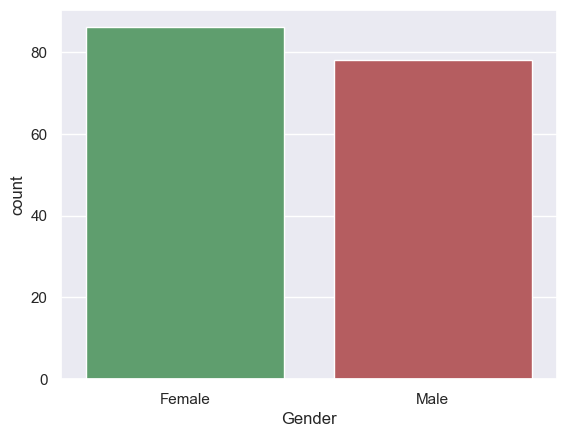

In [28]:
sns.countplot( x= "Gender", data=df, palette=["g","r"])

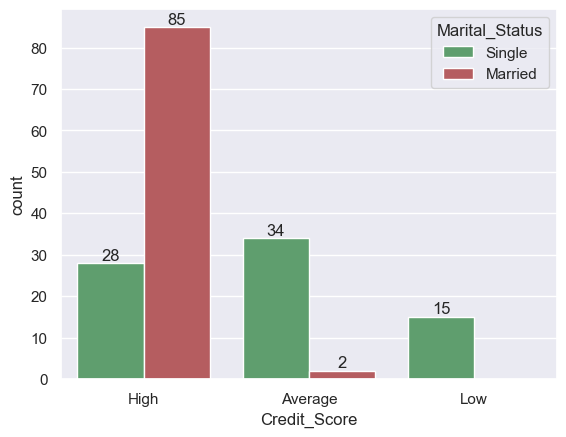

In [29]:
ax = sns.countplot( x= "Credit_Score", data=df, palette=["g","r"],hue="Marital_Status")

for bars in ax.containers:
    ax.bar_label(bars)

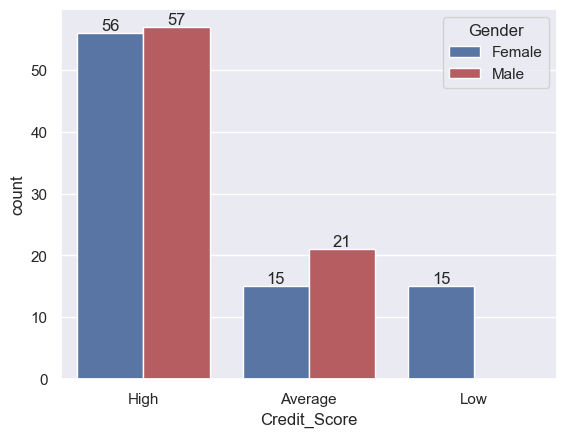

In [30]:
ax1 = sns.countplot( x= "Credit_Score", data=df, palette=["b","r"],hue="Gender")

for bars in ax1.containers:
    ax1.bar_label(bars)

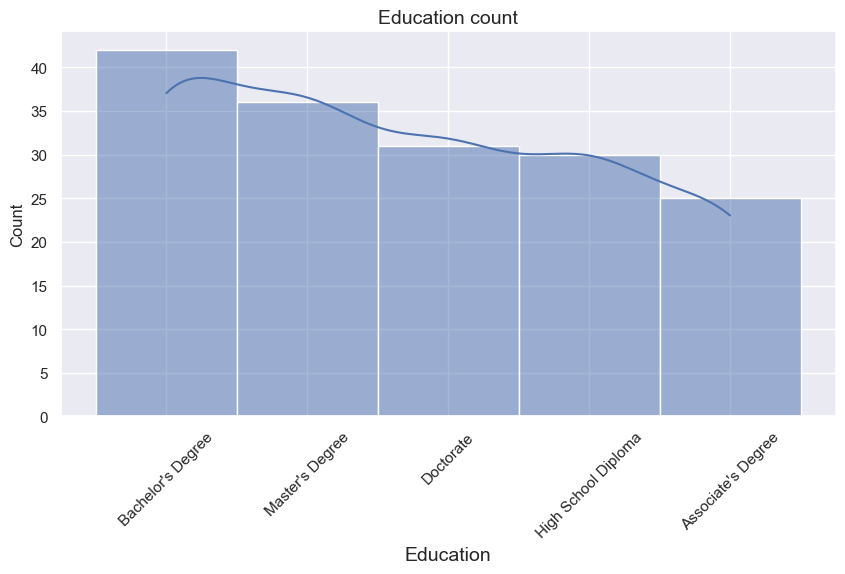

In [31]:
plt.figure(figsize=(10, 5))   
sns.histplot(x='Education', data=df, kde=True)  
plt.title('Education count', fontsize=14)
plt.xlabel('Education', fontsize=14)
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Credit_Score', ylabel='count'>

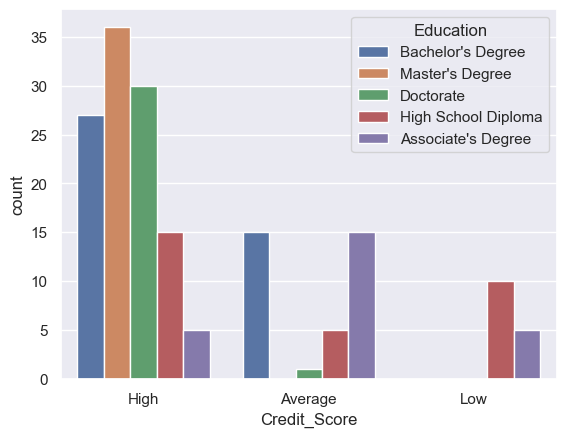

In [32]:
sns.countplot( x= "Credit_Score", data=df,hue="Education")


<Axes: xlabel='Credit_Score', ylabel='count'>

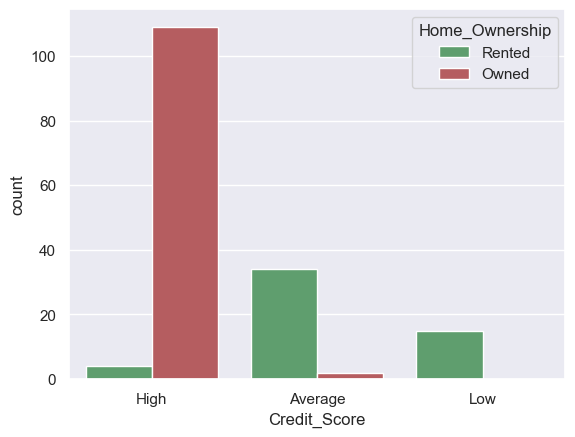

In [33]:
sns.countplot( x= "Credit_Score", data=df,hue="Home_Ownership",palette=["g","r"])

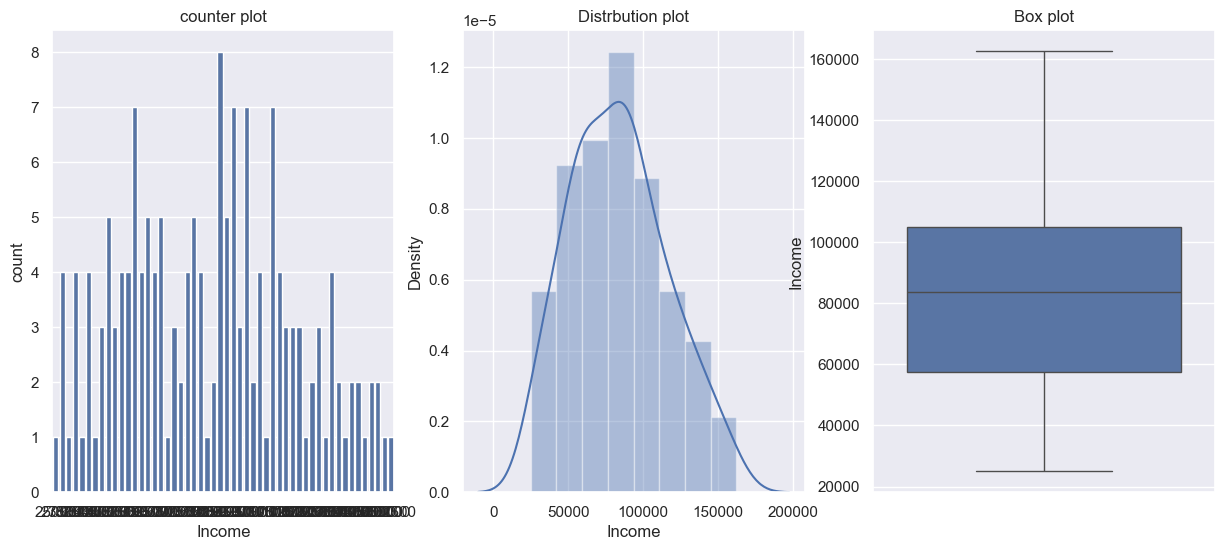

In [34]:
plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
plt.title("counter plot")
sns.countplot( x= "Income", data=df)

plt.subplot(1,3,2)
plt.title("Distrbution plot")
sns.distplot(df["Income"])

plt.subplot(1,3,3)
plt.title("Box plot")
sns.boxplot(y=df["Income"])

plt.show()

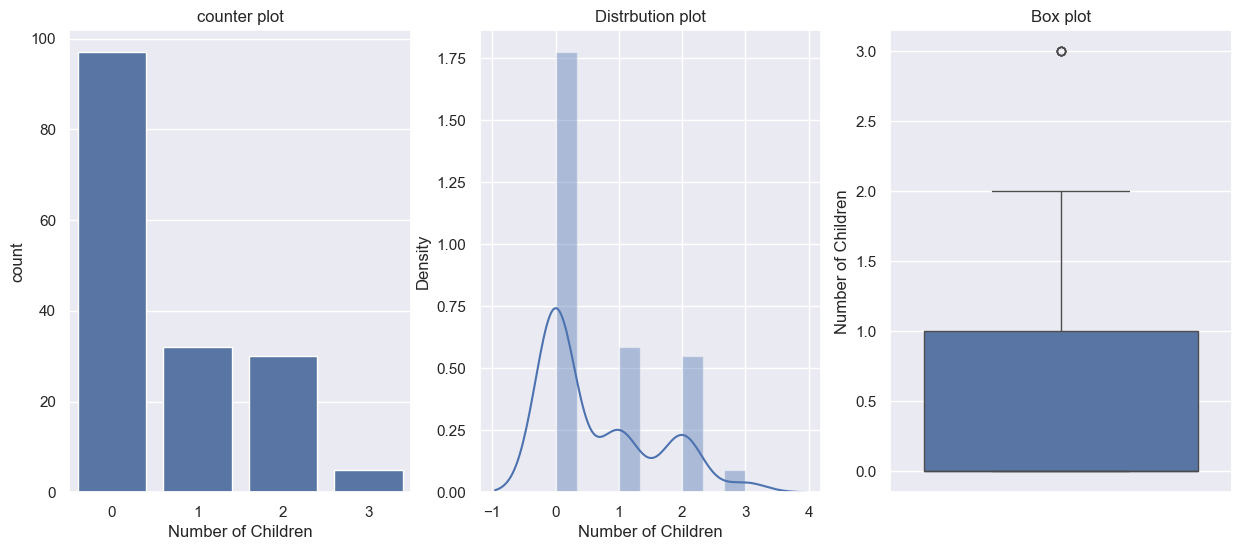

In [35]:
plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
plt.title("counter plot")
sns.countplot( x= "Number of Children", data=df)

plt.subplot(1,3,2)
plt.title("Distrbution plot")
sns.distplot(df["Number of Children"])

plt.subplot(1,3,3)
plt.title("Box plot")
sns.boxplot(y=df["Number of Children"])

plt.show()

<Axes: xlabel='Credit_Score', ylabel='count'>

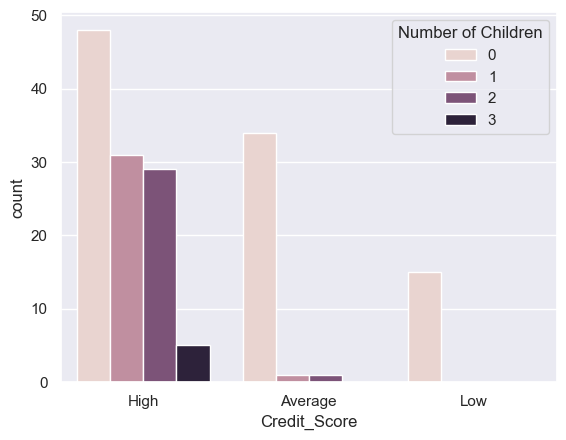

In [36]:
sns.countplot( x= "Credit_Score", data=df,hue="Number of Children")

Feature Engineering

In [37]:
df.isnull().sum()

Age                   0
Gender                0
Income                0
Education             0
Marital_Status        0
Number of Children    0
Home_Ownership        0
Credit_Score          0
dtype: int64

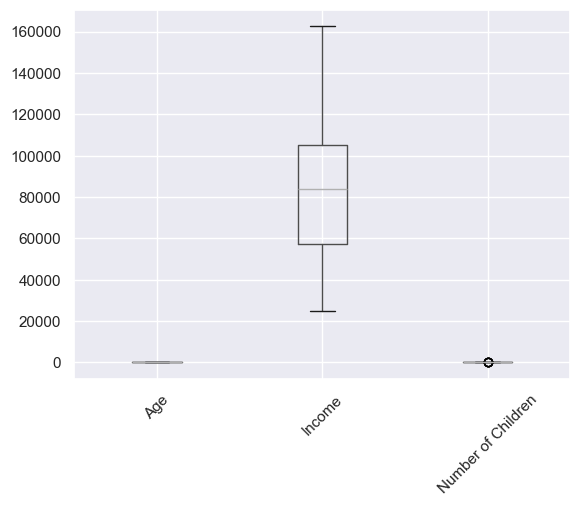

In [38]:
df.boxplot()
plt.xticks(rotation=45)
plt.show()

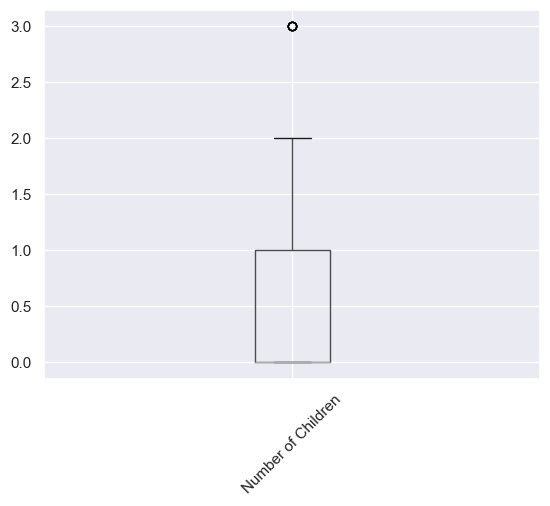

In [39]:
df.boxplot(["Number of Children"])
plt.xticks(rotation=45)
plt.show()

<Axes: ylabel='Age'>

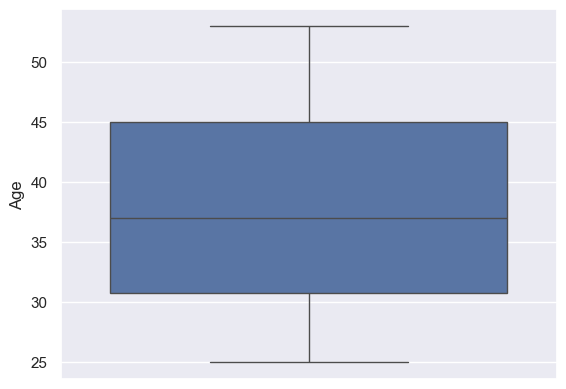

In [40]:
sns.boxplot(df.Age)

In [41]:
lab = LabelEncoder()

obj = df.select_dtypes(include="object")
non_obj=df.select_dtypes(exclude="object")

for i in range(0,obj.shape[1]):
    obj.iloc[:,i]=lab.fit_transform(obj.iloc[:,i])

In [42]:
df_credit = pd.concat([obj,non_obj],axis = 1)

In [43]:
df_credit

,Gender,Education,Marital_Status,Home_Ownership,Credit_Score,Age,Income,Number of Children
0,0,1,1,1,1,25,50000,0
1,1,4,0,0,1,30,100000,2
2,0,2,0,0,1,35,75000,1
3,1,3,1,0,1,40,125000,0
4,0,1,0,0,1,45,100000,3
...,...,...,...,...,...,...,...,...
159,0,3,1,1,2,29,27500,0
160,1,0,1,1,0,34,47500,0
161,0,1,0,0,1,39,62500,2
162,1,4,1,0,1,44,87500,0


Correlation between feature and target

In [44]:
cor = df_credit.corr()
cor

,Gender,Education,Marital_Status,Home_Ownership,Credit_Score,Age,Income,Number of Children
Gender,1.000000,0.248671,0.278362,-0.031519,-0.247729,0.235343,0.495738,-0.442139
Education,0.248671,1.000000,-0.067797,-0.397043,0.334424,0.170254,0.369449,0.047311
Marital_Status,0.278362,-0.067797,1.000000,0.708374,-0.205756,-0.517723,-0.471004,-0.696984
Home_Ownership,-0.031519,-0.397043,0.708374,1.000000,-0.293384,-0.713803,-0.704928,-0.497129
Credit_Score,-0.247729,0.334424,-0.205756,-0.293384,1.000000,0.205362,0.083698,0.136517
Age,0.235343,0.170254,-0.517723,-0.713803,0.205362,1.000000,0.699464,0.055390
Income,0.495738,0.369449,-0.471004,-0.704928,0.083698,0.699464,1.000000,0.084547
Number of Children,-0.442139,0.047311,-0.696984,-0.497129,0.136517,0.055390,0.084547,1.000000


<Axes: >

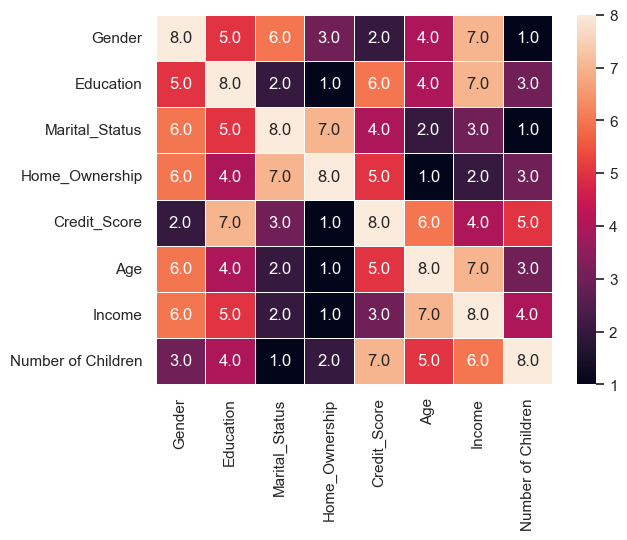

In [45]:
sns.heatmap(cor.rank(axis=1),annot=True,fmt=".1f",linewidths=.5)

Split Data into Train and Test 

In [46]:
X = df_credit.drop(["Credit_Score"],axis=1)
y = df_credit["Credit_Score"]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, shuffle=True)

In [48]:
X_train

,Gender,Education,Marital_Status,Home_Ownership,Age,Income,Number of Children
84,1,0,0,0,53,125000,0
2,0,2,0,0,35,75000,1
94,1,4,0,0,30,117500,2
45,0,2,0,0,47,90000,1
42,1,0,1,1,32,57500,0
...,...,...,...,...,...,...,...
71,0,3,0,0,46,97500,1
106,1,0,1,1,32,57500,0
14,0,1,0,0,37,70000,2
92,0,2,0,0,35,85000,1


In [49]:
pd.DataFrame(y_train)

,Credit_Score
84,1
2,1
94,1
45,1
42,0
...,...
71,1
106,0
14,1
92,1


In [50]:
X_test

,Gender,Education,Marital_Status,Home_Ownership,Age,Income,Number of Children
135,0,1,1,1,25,55000,0
115,0,2,0,0,48,87500,1
131,0,1,0,0,26,55000,1
55,0,1,0,0,39,62500,2
95,0,2,0,0,35,90000,1
29,0,1,1,1,25,55000,0
157,0,2,0,0,48,82500,1
51,0,2,0,0,48,82500,1
101,0,4,0,0,36,95000,2
145,0,3,0,0,46,95000,1


In [51]:
pd.DataFrame(y_test)

,Credit_Score
135,0
115,1
131,0
55,1
95,1
29,0
157,1
51,1
101,1
145,1


Model

In [52]:
def all(model):
    model.fit(X_train,y_train.astype(int))
    pre = model.predict(X_test)
    print(confusion_matrix(pre,y_test.astype(int)))
    print(classification_report(pre,y_test.astype(int)))
    print("score_test=", model.score(X_test ,y_test.astype(int))*100)
    print("score_train=", model.score(X_train ,y_train.astype(int))*100)   
    #sns.heatmap(confusion_matrix(pre,y_test))

In [53]:
model1=KNeighborsClassifier(n_neighbors=8,algorithm="kd_tree", leaf_size=40)
all(model1)

[[ 5  0  0]
 [ 0 23  0]
 [ 0  0  5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00         5

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33

score_test= 100.0
score_train= 96.18320610687023


In [54]:
model2=SVC(kernel='rbf',degree=4,random_state=42)
all(model2)

[[ 5  1  4]
 [ 0 22  0]
 [ 0  0  1]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        10
           1       0.96      1.00      0.98        22
           2       0.20      1.00      0.33         1

    accuracy                           0.85        33
   macro avg       0.72      0.83      0.66        33
weighted avg       0.95      0.85      0.86        33

score_test= 84.84848484848484
score_train= 83.96946564885496


In [55]:
model3=DecisionTreeClassifier()
all(model3)

[[ 5  1  0]
 [ 0 22  0]
 [ 0  0  5]]
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.96      1.00      0.98        22
           2       1.00      1.00      1.00         5

    accuracy                           0.97        33
   macro avg       0.99      0.94      0.96        33
weighted avg       0.97      0.97      0.97        33

score_test= 96.96969696969697
score_train= 100.0


In [56]:
model4=LogisticRegression()
all(model4)

[[ 4  0  0]
 [ 1 23  0]
 [ 0  0  5]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.96      0.98        24
           2       1.00      1.00      1.00         5

    accuracy                           0.97        33
   macro avg       0.93      0.99      0.96        33
weighted avg       0.98      0.97      0.97        33

score_test= 96.96969696969697
score_train= 98.47328244274809


In [57]:
model5=GaussianNB()
all(model5)

[[ 5  0  0]
 [ 0 23  0]
 [ 0  0  5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00         5

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33

score_test= 100.0
score_train= 99.23664122137404


In [58]:

model6=RandomForestClassifier(n_estimators=200,max_depth=6)
all(model6)

[[ 5  0  0]
 [ 0 23  0]
 [ 0  0  5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00         5

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33

score_test= 100.0
score_train= 100.0


In [59]:
model7=GradientBoostingClassifier()
all(model7)

[[ 5  1  0]
 [ 0 22  0]
 [ 0  0  5]]
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.96      1.00      0.98        22
           2       1.00      1.00      1.00         5

    accuracy                           0.97        33
   macro avg       0.99      0.94      0.96        33
weighted avg       0.97      0.97      0.97        33

score_test= 96.96969696969697
score_train= 100.0


In [60]:
model8=AdaBoostClassifier()
all(model8)

[[ 5  0  0]
 [ 0 23  0]
 [ 0  0  5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00         5

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33

score_test= 100.0
score_train= 99.23664122137404



Thank You